In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.layers import Dense, Flatten

import os

# Data for training

In [4]:
train_file = os.listdir("./train/train")

In [5]:
train_file

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg',
 'cat.10005.jpg',
 'cat.10006.jpg',
 'cat.10007.jpg',
 'cat.10008.jpg',
 'cat.10009.jpg',
 'cat.1001.jpg',
 'cat.10010.jpg',
 'cat.10011.jpg',
 'cat.10012.jpg',
 'cat.10013.jpg',
 'cat.10014.jpg',
 'cat.10015.jpg',
 'cat.10016.jpg',
 'cat.10017.jpg',
 'cat.10018.jpg',
 'cat.10019.jpg',
 'cat.1002.jpg',
 'cat.10020.jpg',
 'cat.10021.jpg',
 'cat.10022.jpg',
 'cat.10023.jpg',
 'cat.10024.jpg',
 'cat.10025.jpg',
 'cat.10026.jpg',
 'cat.10027.jpg',
 'cat.10028.jpg',
 'cat.10029.jpg',
 'cat.1003.jpg',
 'cat.10030.jpg',
 'cat.10031.jpg',
 'cat.10032.jpg',
 'cat.10033.jpg',
 'cat.10034.jpg',
 'cat.10035.jpg',
 'cat.10036.jpg',
 'cat.10037.jpg',
 'cat.10038.jpg',
 'cat.10039.jpg',
 'cat.1004.jpg',
 'cat.10040.jpg',
 'cat.10041.jpg',
 'cat.10042.jpg',
 'cat.10043.jpg',
 'cat.10044.jpg',
 'cat.10045.jpg',
 'cat.10046.jpg',
 'cat.1004

In [6]:
animal = []
for file in train_file:
    category = file.split('.')[0]
    if category == 'dog':
        animal.append("Dog")
    else:
        animal.append("Cat")

df_train = pd.DataFrame({
    'file': train_file,
    'animal': animal
})

In [7]:
df_train

,file,animal
0,cat.0.jpg,Cat
1,cat.1.jpg,Cat
2,cat.10.jpg,Cat
3,cat.100.jpg,Cat
4,cat.1000.jpg,Cat
...,...,...
24995,dog.9995.jpg,Dog
24996,dog.9996.jpg,Dog
24997,dog.9997.jpg,Dog
24998,dog.9998.jpg,Dog


In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   file    25000 non-null  object
 1   animal  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


In [47]:
df_train.describe()

,file,animal
count,25000,25000
unique,25000,2
top,cat.7012.jpg,Cat
freq,1,12500


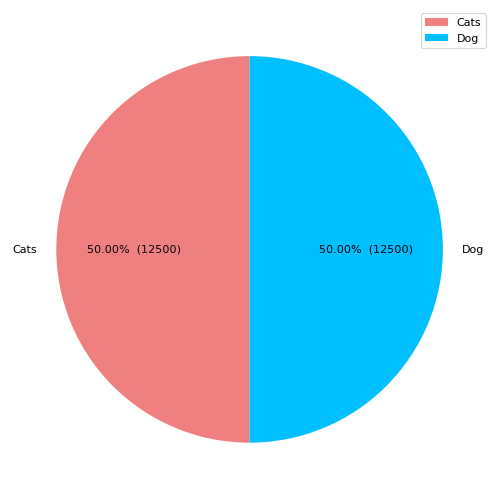

In [8]:
# Total number of Private and Public College
from matplotlib.pyplot import figure
figure(figsize=(10, 8), dpi=80)

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

values = df_train.animal.value_counts()

colors = ['#F08080','#00BFFF']

plt.pie(x=df_train.animal.value_counts()
       ,labels = ['Cats', 'Dog']
       ,startangle=90
       ,autopct=make_autopct(values.values)
       ,colors=colors)


plt.legend()
plt.show() 

In [9]:
train_set, val_set = train_test_split(df_train, test_size=0.30, random_state=42)
train_set = train_set.reset_index(drop=True)
val_set = val_set.reset_index(drop=True)

In [10]:
train_set

,file,animal
0,cat.317.jpg,Cat
1,cat.7152.jpg,Cat
2,dog.9289.jpg,Dog
3,dog.441.jpg,Dog
4,dog.1958.jpg,Dog
...,...,...
17495,dog.6916.jpg,Dog
17496,cat.36.jpg,Cat
17497,cat.10771.jpg,Cat
17498,dog.1713.jpg,Dog


# Training Set

In [53]:
IMAGE_SIZE = (128,128)
BATCH_SIZE = 10

train_data_gen = ImageDataGenerator(
    rotation_range=10,
    rescale=1./255,
    shear_range=0.15, 
    zoom_range=0.15,
    horizontal_flip=True
)


train_generator = train_data_gen.flow_from_dataframe(
    train_set, 
    "./train/train/", 
    x_col='file',
    y_col='animal',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 17500 validated image filenames belonging to 2 classes.


In [54]:
train_generator

# Validation Set

In [55]:
validation_data_gen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_data_gen.flow_from_dataframe(
    val_set, 
    "./train/train", 
    x_col='file',
    y_col='animal',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 7500 validated image filenames belonging to 2 classes.


In [56]:
#Might need o be remove
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stop = EarlyStopping(patience=10)

lr = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# Train Model

# 1st Model

In [57]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 63, 63, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 254016)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65028352  
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 254016)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               65028352  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 5

In [58]:
epoc=10
total_train = train_set.shape[0]
total_validate = val_set.shape[0]

history_1 = model.fit_generator(
    train_generator, 
    epochs=epoc,
    validation_data=validation_generator,
    validation_steps=total_validate//BATCH_SIZE,
    steps_per_epoch=total_train//BATCH_SIZE
)

Epoch 1/10
1750/1750 [==============================] - 707s 404ms/step - loss: 0.6769 - accuracy: 0.6295 - val_loss: 0.6262 - val_accuracy: 0.6545
Epoch 2/10
1750/1750 [==============================] - 707s 404ms/step - loss: 0.6047 - accuracy: 0.6803 - val_loss: 0.5831 - val_accuracy: 0.6947
Epoch 3/10
1750/1750 [==============================] - 695s 397ms/step - loss: 0.5884 - accuracy: 0.6946 - val_loss: 0.5482 - val_accuracy: 0.7192
Epoch 4/10
1750/1750 [==============================] - 689s 393ms/step - loss: 0.5700 - accuracy: 0.7081 - val_loss: 0.5784 - val_accuracy: 0.7155
Epoch 5/10
1750/1750 [==============================] - 699s 400ms/step - loss: 0.5614 - accuracy: 0.7150 - val_loss: 0.5216 - val_accuracy: 0.7405
Epoch 6/10
1750/1750 [==============================] - 723s 413ms/step - loss: 0.5521 - accuracy: 0.7221 - val_loss: 0.5227 - val_accuracy: 0.7328
Epoch 7/10
1750/1750 [==============================] - 709s 405ms/step - loss: 0.5469 - accuracy: 0.7254 - val_

In [ ]:
history_1.history

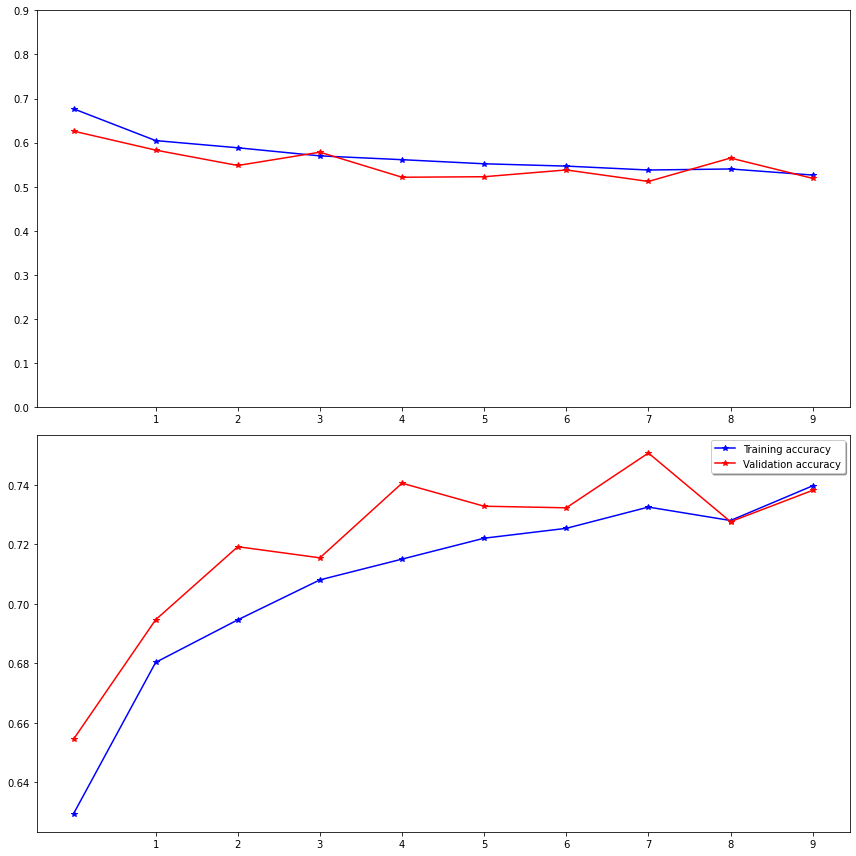

In [62]:
###############################################################################################################################

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

ax1.plot(history_1.history['loss'], color='b', label="Training loss",marker='*')
ax1.plot(history_1.history['val_loss'], color='r', label="validation loss",marker='*')
ax1.set_xticks(np.arange(1, epoc, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))


ax2.plot(history_1.history['accuracy'], color='b', label="Training accuracy",marker='*')
ax2.plot(history_1.history['val_accuracy'], color='r',label="Validation accuracy",marker='*')
ax2.set_xticks(np.arange(1, epoc, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# 2nd Model

In [59]:
model2 = Sequential()

model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.5))

model2.add(Conv2D(512, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.5))

model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(BatchNormalization())

model2.add(Dropout(0.5))
model2.add(Dense(2, activation='sigmoid'))  


In [60]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 128)      

In [26]:
epoc=10
total_train = train_set.shape[0]
total_validate = val_set.shape[0]

history_2 = model2.fit_generator(
    train_generator, 
    epochs=epoc,
    validation_data=validation_generator,
    validation_steps=total_validate//BATCH_SIZE,
    steps_per_epoch=total_train//BATCH_SIZE,

)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
1750/1750 [==============================] - 589s 336ms/step - loss: 0.6245 - accuracy: 0.6717 - val_loss: 0.5862 - val_accuracy: 0.6816
Epoch 2/10
1750/1750 [==============================] - 574s 328ms/step - loss: 0.5280 - accuracy: 0.7413 - val_loss: 0.5552 - val_accuracy: 0.6969
Epoch 3/10
1750/1750 [==============================] - 567s 324ms/step - loss: 0.4931 - accuracy: 0.7655 - val_loss: 0.5436 - val_accuracy: 0.7099
Epoch 4/10
1750/1750 [==============================] - 567s 324ms/step - loss: 0.4467 - accuracy: 0.7943 - val_loss: 0.4139 - val_accuracy: 0.8244
Epoch 5/10
1750/1750 [==============================] - 593s 339ms/step - loss: 0.4170 - accuracy: 0.8114 - val_loss: 0.3941 - val_accuracy: 0.8233
Epoch 6/10
1750/1750 [==============================] - 556s 318ms/step - loss: 0.3945 - accuracy: 0.8282 - val_loss: 0.3402 - val_accuracy: 0.8539
Epoch 7/10
1750/1750 [==============

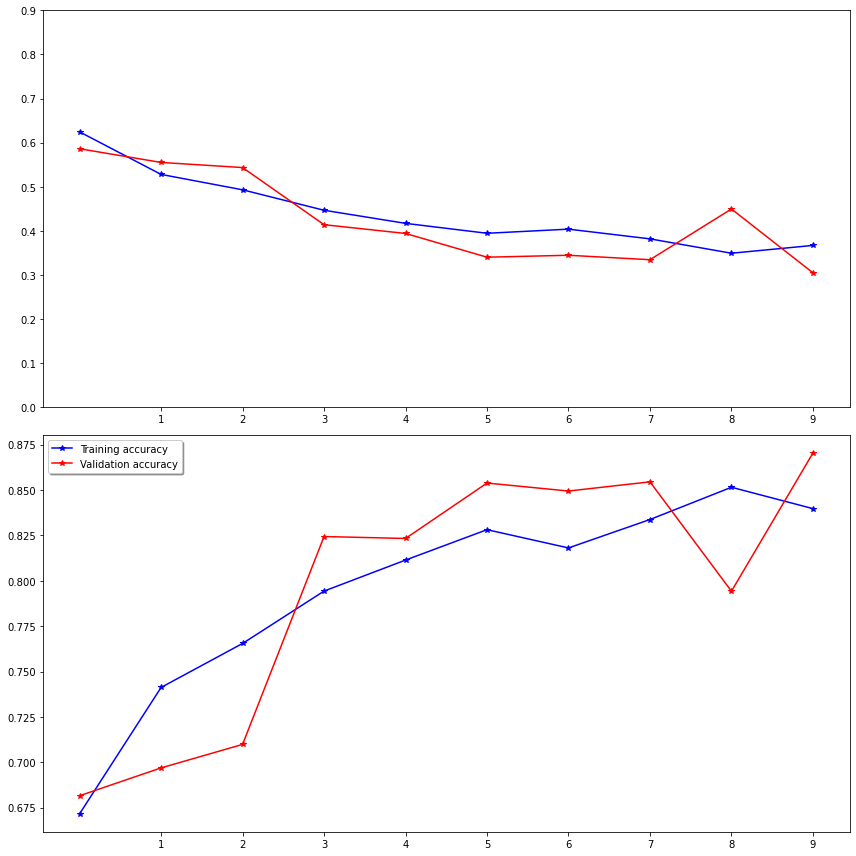

In [27]:
###############################################################################################################################

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

ax1.plot(history_2.history['loss'], color='b', label="Training loss",marker='*')
ax1.plot(history_2.history['val_loss'], color='r', label="validation loss",marker='*')
ax1.set_xticks(np.arange(1, epoc, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))


ax2.plot(history_2.history['accuracy'], color='b', label="Training accuracy",marker='*')
ax2.plot(history_2.history['val_accuracy'], color='r',label="Validation accuracy",marker='*')
ax2.set_xticks(np.arange(1, epoc, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()


# 3rd Model

In [50]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import VGG16

model3_VGG16 = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
model3_VGG16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [51]:
model3 = Sequential()

model3.add(Flatten())
model3.add(Dense(512, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(2, activation='sigmoid')) 

model3_VGG16 = Model(inputs=model3_VGG16.input, outputs=model3(model3_VGG16.output))

# only train the additional layers and the last layer of VGG16, freeze the rest
for layer in model3_VGG16.layers[:-(len(model3_VGG16.layers)+1)]:
    layer.trainable = False

In [52]:
model3_VGG16.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model3_VGG16.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)      

In [46]:
epoc=10
total_train = train_set.shape[0]
total_validate = val_set.shape[0]

history_3 = model3_VGG16.fit_generator(
    train_generator, 
    epochs=epoc,
    validation_data=validation_generator,
    validation_steps=total_validate//BATCH_SIZE,
    steps_per_epoch=total_train//BATCH_SIZE,

)

Epoch 1/10
1750/1750 [==============================] - 3495s 2s/step - loss: 0.6503 - accuracy: 0.6398 - val_loss: 0.6750 - val_accuracy: 0.6169
Epoch 2/10
1750/1750 [==============================] - 3415s 2s/step - loss: 0.5533 - accuracy: 0.7302 - val_loss: 34088.9609 - val_accuracy: 0.6485
Epoch 3/10
1750/1750 [==============================] - 3384s 2s/step - loss: 0.4714 - accuracy: 0.7839 - val_loss: 684327.3125 - val_accuracy: 0.7760
Epoch 4/10
1750/1750 [==============================] - 3390s 2s/step - loss: 0.4154 - accuracy: 0.8158 - val_loss: 1.1393 - val_accuracy: 0.8711
Epoch 5/10
1750/1750 [==============================] - 3373s 2s/step - loss: 0.3700 - accuracy: 0.8442 - val_loss: 82956.0391 - val_accuracy: 0.8467
Epoch 6/10
1750/1750 [==============================] - 3393s 2s/step - loss: 0.3452 - accuracy: 0.8536 - val_loss: 3385534.7500 - val_accuracy: 0.6568
Epoch 7/10
1750/1750 [==============================] - 3378s 2s/step - loss: 0.3191 - accuracy: 0.8690 -

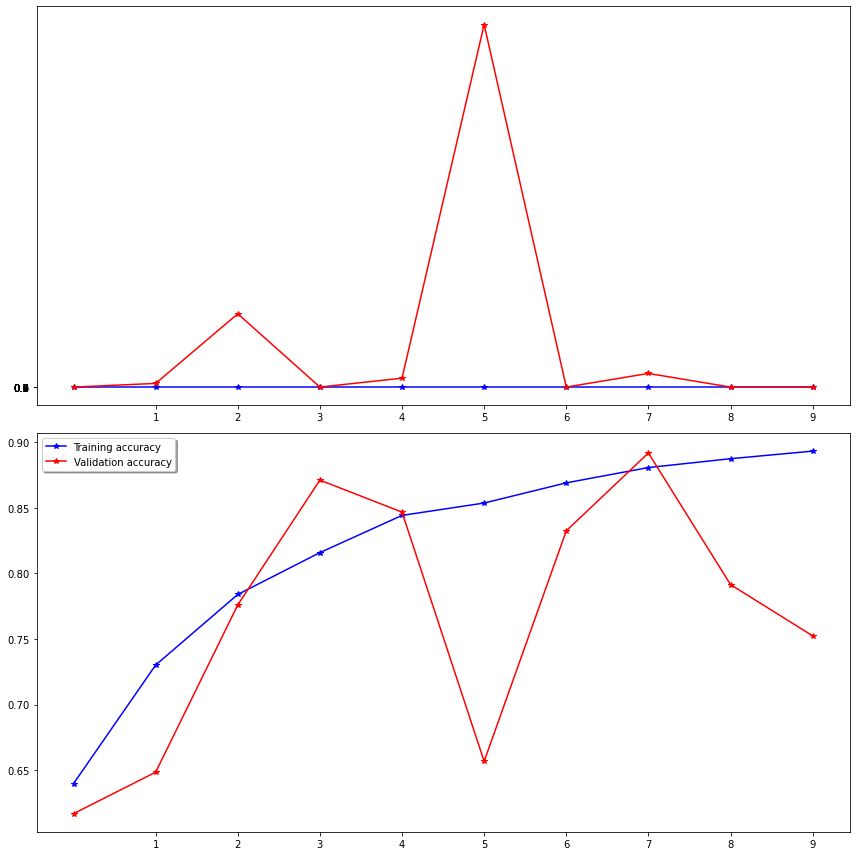

In [49]:
###############################################################################################################################

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

ax1.plot(history_3.history['loss'], color='b', label="Training loss",marker='*')
ax1.plot(history_3.history['val_loss'], color='r', label="validation loss",marker='*')
ax1.set_xticks(np.arange(1, epoc, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))


ax2.plot(history_3.history['accuracy'], color='b', label="Training accuracy",marker='*')
ax2.plot(history_3.history['val_accuracy'], color='r',label="Validation accuracy",marker='*')
ax2.set_xticks(np.arange(1, epoc, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [13]:
df_test = pd.DataFrame({
    'file':  os.listdir("./test/test")
})

In [14]:
df_test

,file
0,1.jpg
1,10.jpg
2,100.jpg
3,1000.jpg
4,10000.jpg
...,...
12495,9995.jpg
12496,9996.jpg
12497,9997.jpg
12498,9998.jpg


In [28]:
test_data_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_data_gen.flow_from_dataframe(
    df_test, 
    "./test/test/", 
    x_col='file',
    y_col=None,
    class_mode=None,
    target_size=(128, 128),
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 12500 validated image filenames.


In [31]:
predict = model2.predict_generator(test_generator, steps=np.ceil(df_test.shape[0]/BATCH_SIZE))

Instructions for updating:
Please use Model.predict, which supports generators.


In [42]:
df_test['animal'] = np.argmax(predict, axis=-1)
df_test['animal'] = df_test['animal'].apply(lambda x: 'Cat' if x == 0 else 'Dog')
df_test.head()

,file,animal
0,1.jpg,Dog
1,10.jpg,Cat
2,100.jpg,Dog
3,1000.jpg,Dog
4,10000.jpg,Cat


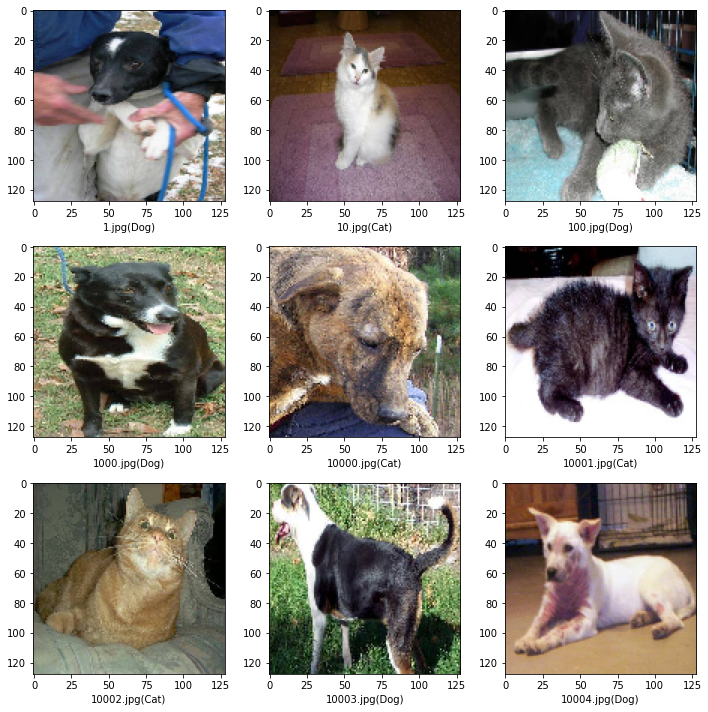

In [48]:

plt.figure(figsize=(10, 10))
for index, row in df_test.head(9).iterrows():
    file = row['file']
    animal = row['animal']
    img = load_img("./test/test/"+file, target_size=(128, 128))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(file + '(' + "{}".format(animal) + ')' )
plt.tight_layout()
plt.show()